# F21DL CW(P4): Linear Classification and MLP

## [INCOME DATA SET](https://www.kaggle.com/mastmustu/income?select=test.csv)

## SETUP

In [36]:
import pandas as pd
import numpy as np
from numpy import mean, std
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, explained_variance_score, classification_report, log_loss,silhouette_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier

## IMPORTING DATA

In [3]:
income = pd.read_csv("Income Dataset.csv")

## DESCRIBING DATA

#### This is a dataset income level of workers of different age/occupation etc.

In [4]:
income

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [5]:
income.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income_>50K         int64
dtype: object

In [6]:
income.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [7]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [8]:
income.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

<div class="alert alert-block alert-success">
<b>Analysis:</b> From the above table, we can conclude that the data set has missing values.
</div>

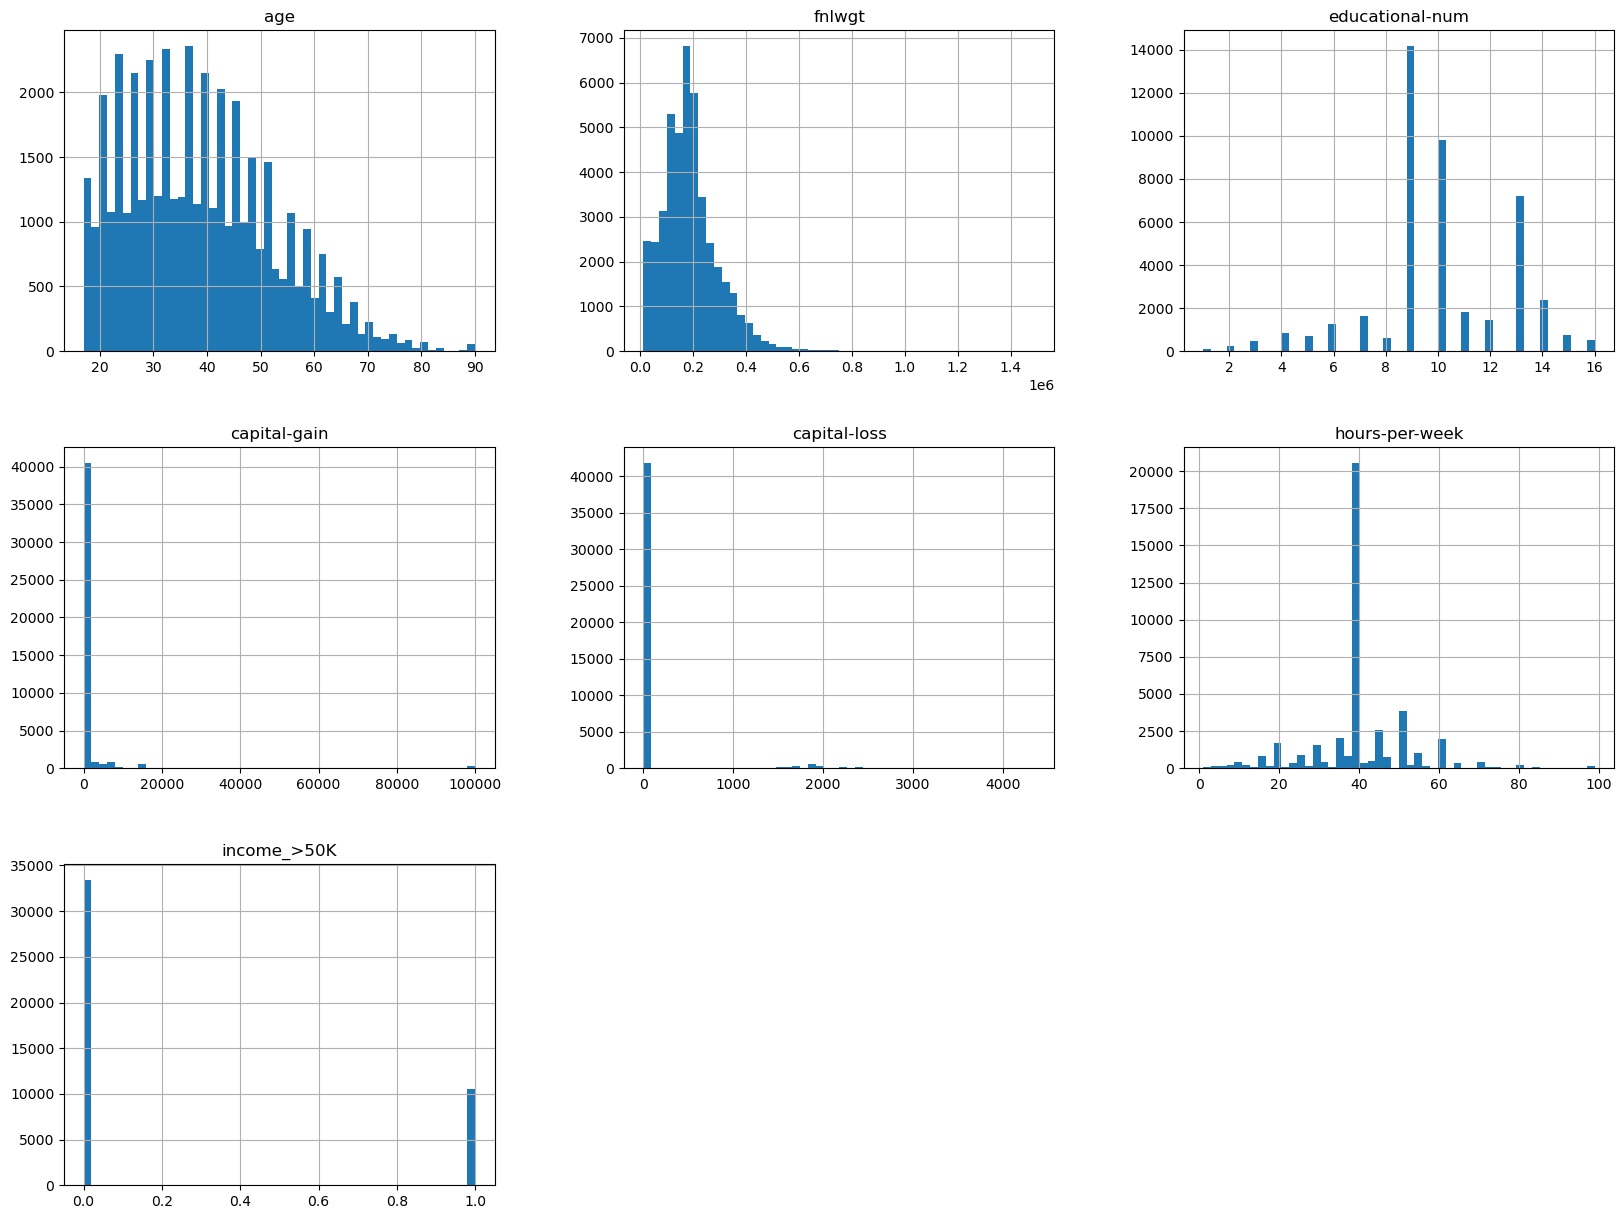

In [9]:
income.hist(bins = 50, figsize=(20,15))
plt.show()

### Filling Up Missing Values

In [10]:
income["workclass"].fillna("missing", inplace = True)
income["occupation"].fillna("missing", inplace = True)
income["native-country"].fillna("missing", inplace = True)

In [11]:
income.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

<div class="alert alert-block alert-success">
<b>Analysis:</b> No missing values</div>

## VISUALIZING DATA

In [12]:
income.plot(kind="scatter", x="age", y="hours-per-week")


<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

<div class="alert alert-block alert-success">
<b>Analysis:</b> 1 worker at age 90 works 100 hours a week</div>

In [13]:
#correlation of attirbutes
corr_matrix = income.corr()

In [14]:
corr_matrix["income_>50K"].sort_values(ascending = False)

income_>50K        1.000000
educational-num    0.334035
age                0.230988
hours-per-week     0.227918
capital-gain       0.223325
capital-loss       0.145250
fnlwgt            -0.006852
Name: income_>50K, dtype: float64

In [15]:
ax = sns.heatmap(corr_matrix)
#Heatmap showing the correlation of all attributes

<div class="alert alert-block alert-success">
<b>Analysis:</b> Income_>50 has a high correlation with educational-num</div>

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["age","capital-loss","capital-gain", "hours-per-week"]
scatter_matrix(income[attributes], figsize = (12,8));

In [17]:
income.plot.hist(figsize = (10,30),bins = 20, subplots = True);

<div class="alert alert-block alert-success">
<b>Analysis:</b> Final Weight shows a normal distribution frequency
</div>

# F21DL CW1(P1): MACHINE LEARNING

## Dataset 1 (Taking all attributes in the parent dataset as features)
### Setting up the data 
##### We are taking class as income_>50


In [18]:
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [19]:
#Removing target attribute(income_>50K) from the dataset
X = income.drop('income_>50K', axis = 1)
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States


In [20]:
#Creating a set with only the target attribute
y = income['income_>50K']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: income_>50K, dtype: int64

In [21]:
# Splitting data into target and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) #20% of the whole datset is the test size

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35165, 14), (8792, 14), (35165,), (8792,))

In [22]:
X_test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
11806,50,Private,195298,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
21795,21,Private,190227,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States
22227,30,Private,72630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
4007,43,Federal-gov,211450,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States
13050,54,Private,182314,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,50,United-States


In [23]:
y_test.head()

11806    1
21795    0
22227    0
4007     0
13050    1
Name: income_>50K, dtype: int64

### Converting categorical values to numerical values

In [24]:
#Converting categorical values into numerical values using dummies
dummies = pd.get_dummies(income[["age", "workclass", "education", "educational-num", "capital-gain", "capital-loss", "fnlwgt", "marital-status", "occupation", 
                           "relationship", "race", "gender","hours-per-week","native-country"]])
dummies


,age,educational-num,capital-gain,capital-loss,fnlwgt,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_missing
0,67,16,99999,0,366425,60,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,17,8,0,0,244602,15,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,31,13,0,0,174201,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,58,4,0,0,110199,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,25,10,0,0,149248,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,13,0,0,68982,50,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
43953,19,9,0,0,116562,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
43954,30,10,0,0,197947,58,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
43955,46,13,0,0,97883,35,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [25]:
#Checking if our categorical variable has converted into a numerical value
X["workclass"].value_counts()

Private             30587
Self-emp-not-inc     3464
Local-gov            2822
missing              2498
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: workclass, dtype: int64

In [26]:
#Refitting the model
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(dummies, y, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35165, 108), (8792, 108), (35165,), (8792,))

## Linear Classification

In [27]:
#Without K-fold cross validation
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [28]:
print(f"Accuracy of the model = {accuracy_score(y_test, y_pred):.2%}")

Accuracy of the model = 79.49%


In [60]:
#Accuracy of linear classifier for 10-fold cross validation 
cross_val_score(clf, dummies, y, cv=10)

array([0.79868062, 0.7966333 , 0.79822566, 0.79845314, 0.79913558,
       0.79936306, 0.79959054, 0.79658703, 0.79908987, 0.79908987])

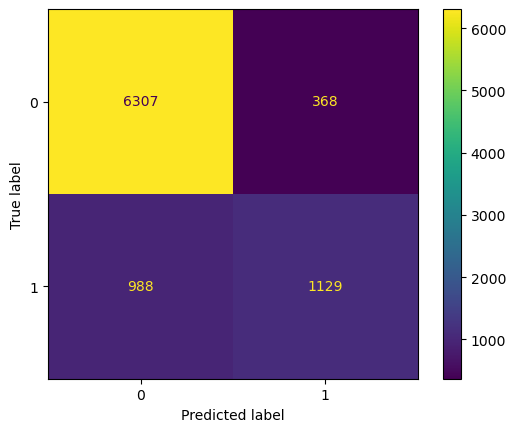

In [70]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

## Multilayer Perceptrons

In [37]:
#Training model with multilayer Perceptron
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier()

In [38]:
y_pred = mlp.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [39]:
print(f"Accuracy of the model = {accuracy_score(y_test, y_pred):.2%}")

Accuracy of the model = 79.47%


### Experimenting with different parameters

In [94]:
#Training model with multilayer Perceptron
np.random.seed(20)
mlp = MLPClassifier(hidden_layer_sizes=(200,400), activation = 'relu', learning_rate = 'adaptive', momentum = 1 )
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(200, 400), learning_rate='adaptive',
              momentum=1)

In [115]:
y_pred = mlp.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
print(f"Accuracy of the model = {accuracy_score(y_test, y_pred):.2%}")

Accuracy of the model = 83.83%


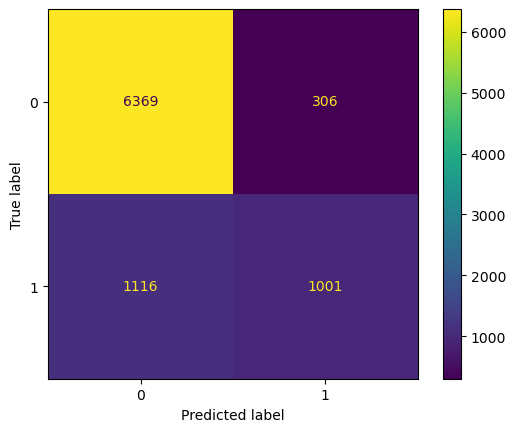

In [97]:
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp.classes_)
disp.plot()
plt.show()

In [98]:
#ROC Curve
y_probs = mlp.predict_proba(X_train)
y_probs = y_probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr

array([0.       , 0.0458427, 1.       ])

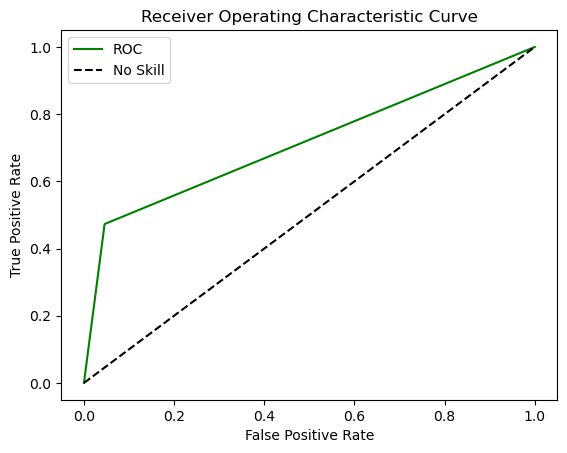

In [99]:
def plot_roc_curve(fpr, tpr):
    # Plot ROC curve
    plt.plot(fpr, tpr, color='green', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='No Skill')
    # Customization of the plot
    plt.title('Receiver Operating Characteristic Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)